<a href="https://colab.research.google.com/github/ika-si/AI-Fri45/blob/main/search_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pythonで迷路（＝グラフ）探索アルゴリズムを実装する

## 0. 準備編（迷路の作成と表示）

### 0-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。

### 0-1. 迷路を有向グラフとして保持するクラスを作成してみよう
- 次のセルのコードでは、Graphクラスと言うオリジナルのクラスを作成している。
  - メンバ変数としてgraphという辞書型の変数を用意している。これがグラフの実体で、ある要素（ノード）から遷移可能な要素（ノード）が配列として格納されている。
  - 試しに今の状態で実行してみよう。セルを選択してCtrl+Enterを押下すると楽。
```
defaultdict(<class 'list'>, {0: [1], 1: [2], 2: [3]})
```
- 上記の実行結果は次の様な迷路を意味している。講義を確認し、実際の迷路のスタートノード、ノード1とノード2の関係と見比べてみよう。
  - ノード0（スタート）からノード1に遷移できる。
  - ノード1からノード2に遷移できる。
  - ノード2からノード3に遷移できる。
- **実はこのままだと問題がある。**
  - **例えばノード0からノード1に動くことはできるのだが、ノード1からノード0に戻る（遷移する）ことができない表現になっている。**
  - 以降の実装ではグラフを有向グラフとして扱うので、両方のノードからお互いのノードを遷移先として登録する必要がある。
- この問題を解決する単純な手段は、mainの部分にあるg.addEdgeを2倍書くことだ。今は
```
    g.addEdge(0, 1)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
```
となっているところを、
```
    g.addEdge(0, 1)
    g.addEdge(1, 0)
    g.addEdge(1, 2)
    g.addEdge(2, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 2)
```
として実行してみよう。**実行してみたら次のステップへ。**

In [1]:
from collections import defaultdict 

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 


if __name__ == "__main__":
  
    # グラフを作成する
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 2)
    g.addEdge(2, 3)

    # グラフの表示
    print(g.graph)



defaultdict(<class 'list'>, {0: [1], 1: [2], 2: [3]})


### 0-2. より賢い方法を考える
- 👆を指示通りに進めると、最後に実行した際に以下の様な出力が得られるはずだ。
```
defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2]})
```
  - ノード0とノード1、ノード1とノード2、ノード2とノード3が相互に遷移可能なノードとして登録されていることを確認しよう。
- しかし、この方法を採用するとg.addEdgeを大量に呼び出す必要がある。
  - これから先、講義で見せた迷路のように、ノード4からノード8とゴールのノード（ノード9）を追加したい。
  - それぞれを同じように2回ずつg.addEdgeを読んで接続していくと、手間がかかる。こうした手間はヒューマンエラーによってバグを引き起こしやすい場所でもある。
- 以下のコードで「0-2.で何かを埋める行」というコメントがある部分に注目する。
  - ここに1行加えると、mainの部分はそのままでもノード同士が双方向に接続された出力が得られる。
```
defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2]})
```
- **「0-2.で何かを埋める行」に何を入れるべきか考えて、実際に上記の出力が得られるようにしよう。（g.addEdgeの部分は変えないこと。）うまく行ったら次のステップへ。**

In [2]:
from collections import defaultdict 

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        #--------- 0-2.で何かを埋める行 ---------# 
        self.graph[v].append(u)

if __name__ == "__main__":
  
    # グラフを作成する
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    
    # グラフの表示
    print(g.graph)



defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2]})


### 0-3. グラフの完成と表示～プログラミングのロールプレイング
- **講義を確認しながら、「0-3.で数行追加する部分」で必要な数だけg.addEdgeを呼び出し、残りのノードとエッジを繋いでいこう。**
  - 最終的には以下の様な出力が得られるはずである。
```
defaultdict(<class 'list'>, {0: [1], 1: [0, 4, 2], 4: [1, 2, 7], 2: [1, 3, 4], 3: [2], 7: [4, 6, 5], 6: [7], 5: [7, 8, 9], 8: [5], 9: [5]})
```
  - **しかし、このように単に標準出力でノードの接続関係を配列で見るだけだと、内容が分かりにくいし、合っているのかどうかも判断しづらい。**
- そこで、グラフの表示にnetworkxというモジュールが使えることを知ったとしよう。
  - 「networkxのdrawという関数で表示できるよー」という情報も得た。
  - 早速以下のコードのように、networkxとこれを表示するためのmatplotlibをimportした。
  - 以下の行を探そう。
  ```
      # nx.draw(g.graph, with_labels=True) # 0-3.で何かを修正する行 
  ```
  - コメント命令を外して実行してみよう。**勘のいい人なら予想できたと思うが、うまく行かない。エラーを吐いて終わってしまう。**
  ```
      # nx.draw(g.graph, with_labels=True) # 0-3.で何かを修正する行 
  ```
- これはプログラミング中に良くあることで、教科書やweb上の情報などで動くコードとして掲載されているものでも、バージョンの違いなどで動かなくなっていることは珍しくない。
  - まずは networkx のドキュメントを読むべき。安定バージョンのドキュメントは https://networkx.org/documentation/stable/ にある。
  - 左上に「Search docs」にと言うボックスがあるので、drawと入れて検索してみよう。色々出てくると思うが、今は https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw を選んだとしよう。
  - この項目を読むと、draw_networkxという関数の方がより色々と設定できるようだ。そちらの説明も開いてみよう。（項目内にdraw_networkxの説明へのリンクがある。）
- **0. 準備編 の最終課題：グラフ構造をnetworkxで表示できるようにしよう。**
  - **エラーをみるとg.graphをそのままdrawに渡してもダメなようだ。**
    - ドキュメントをみるとこの引数は"A networkx graph"と書いてある。
    - networkxモジュールでは、networkxオリジナルの型の変数としてグラフを取り扱っているのかもしれない。
    - 今定義している辞書型の変数g.graphをnetworkxオリジナルの型に変換できればよいのではないか。
    - **g.graphをnetworkxオリジナルの型に変換する関数を探し、エラーを解決しよう。** ヒント：変数の型を「変換」する機能をドキュメント内で検索したい。もちろん日本語で変換と入れてもダメ。変数の型の変換は英語では convert である。
  - **エラーは解決出来て、グラフも表示された。が、どのノードがどの番号のノードなのかが分からない。**
    - 何かノードの名前が表示できる方法はないだろうか。
    - **先ほど見たdraw_networkxの説明をよく読んで、ノードのラベルが表示されるオプションを探し、ノードの名前が見えるようにしよう。**
  - **上記2点が解決されたグループは、TAに対して表示されたグラフを見せること（誰か1名でよい）。上記2点を満たしていることが認められた場合は、TAから1.深さ優先探索編のURLを知らされる。**

defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2]})


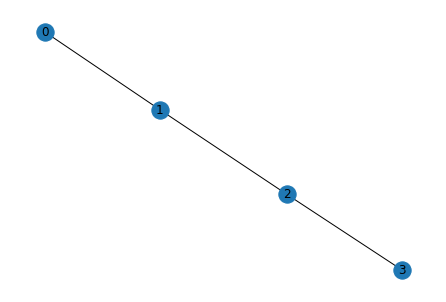

In [25]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx

# 迷路をグラフとして保持するクラス
class Graph: 
  
    # コンストラクタ（クラスを初期化する） 
    def __init__(self): 
  
        # pythonのcollectionsから辞書型の変数を宣言し、このクラスのメンバ変数として定義
        self.graph = defaultdict(list) 
  
    # u番目のノードとv番目のノードの間に双方向のエッジを張る
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        #--------- 0-2.で何かを埋める行 ---------# 
        self.graph[v].append(u)
  
if __name__ == "__main__":
  
    # グラフを作成する
    # 講義で表示されているとおりのグラフをここで作成する 
    # (Sを0、Gを9とし、その他のノードは番号通り1から8までとする)
    g = Graph() 
    g.addEdge(0, 1)
    g.addEdge(1, 2)
    g.addEdge(2, 3)
    # 0-3.で数行追加する部分
    G = nx.to_networkx_graph(g.graph)

    # グラフの表示
    print(g.graph)

    # グラフの図示にはnetworkxを用いる
    # drawという関数を使えばグラフが表示されるはずだが…？
    # nx.draw(g.graph) # 0-3.で何かを修正する行 
    nx.draw(G, with_labels=True)
    plt.show()

